In [2]:
#Import modules for working with real numbers
import pandas as pd
import numpy as np
import math
from scipy import stats
import random

#Import modules for working with plots
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits.mplot3d.axes3d as p3

#Import modules for working with dates
import datetime as dt
from dateutil.relativedelta import relativedelta
from datetime import timedelta

#Useful to view the plots neatly together
%matplotlib inline

In [3]:
"""
Robert Shiller's data from Yale's Department of Economics
containing various market and economic data from 1871.
http://www.econ.yale.edu/~shiller/data.htm

In the first data imported, chapt26-10.csv, I have modified some of
the data to include the most recent years as well as 
manually inserting two additional asset classes: Shiller's other
housing price index data and the price of gold from measuringworth.com.
I have adjusted these for the CPI to make them real values,
corresponding to value=100 in the year 1890.
"""

#Import local datasets - only three at the moment

ch26_1 = pd.read_csv("chapt26-10.csv")
ch26_2 = pd.read_csv('chapt26-2.csv')

#div = pd.read_csv('Dvd_payments-1.csv')
#earnings = pd.read_csv('Earnings.csv')

fig3_1 = pd.read_csv('Fig3-1.csv')

#gov_bonds = pd.read_csv('Government Security Prices 1843 - 1860.csv')
#ie_data = pd.read_csv('ie_data.csv')
#bond_int = pd.read_csv('IndexofBondInterest.csv')
#nyse_div = pd.read_csv('nyse-annual-dividend-1825-1870.csv')
#nyse_mo_price = pd.read_csv('NYSEmonthlyprice1815_1925.rtf')
#nyse = pd.read_csv('NYSEnames.rft')
#old_nyse = pd.read_csv('oldNYSEannualseries.csv')
#PEratio = pd.read_csv('Price_EarningsRatio.csv')
#stock_earnings = pd.read_csv('PriceStockswithEarningsData.csv')
#stock_prices_mean = pd.read_csv('Stock_Price-Annavg-1871-1940.csv')
#stock_prices_end = pd.read_csv('Stock_Price-Yearend-1871-1940.csv')
#stock_prices = pd.read_csv('Stock_Prices.csv')
#stock_return = pd.read_csv('Stock_PricesincDvds.csv')
#yield_exp = pd.read_csv('Yield_Expectations.csv')

In [4]:
#print string description of the data from the dataset
#       "Shiller, R., U.S.Stock Price Data, Annual, with consumption,
#        both short and long rates, and present value calculations.",
print(ch26_1.columns[0])
print(ch26_1.iloc[0,0])
ch26_1.columns.values[0] = 'Year'
del ch26_1['Unnamed: 9']

#Recreate column names.
ch26_1.rename(
    columns={
        "Unnamed: 1":"S&P_Price",
        "Unnamed: 2":"S&P_Dividends",
        "Unnamed: 3":"S&P_Earnings",
        "Unnamed: 4":"rf_1yr",
        "Unnamed: 5":"rf_10yr",
        "Unnamed: 6":"CPI",
        "Unnamed: 7":"real_1yr",
        "Unnamed: 8":"real_pc_c",
        "Unnamed: 10":"real_stock_price",
        "Unnamed: 11":"pv_real_dividends_const_r",
        "Unnamed: 12":"pv_real_dividends_r",
        "Unnamed: 13":"pv_real_dividends_const_disc",
        "Unnamed: 14":"S&P_real_Dividend",
        "Unnamed: 15":"S&P_Return",
        "Unnamed: 16":"ln_S&P_Return",
        "Unnamed: 17":"real_Earnings",
        "Unnamed: 18":"P/E",
        "Unnamed: 19":"E_10yr",
        "Unnamed: 20":"P/(E_10yr)",
        "Unnamed: 21":"Gold",
        "Unnamed: 22":"Real_Estate"
            },
    inplace=True
)

#Drop the first 26 rows since tbe first 7 rows are
#not numbers, and the first 19 years do not have
#data for real estate values.
ch26_1.drop(ch26_1.index[0:26],
           inplace=True
           )

#The last 7 rows are also not numbers.
ch26_1.drop(ch26_1.index[-7:],
            inplace=True
           )

ch26_1.set_index(ch26_1.iloc[:,0],
                 inplace=True
                )
del ch26_1[ch26_1.columns[0]]
ch26_1['real_pc_c'].iloc[:3] = 'NaN'\

#manually converting a couple S&P 500 index prices from
#a string value to ints.
ch26_1.loc['2004'][0] = 1132.5
ch26_1.loc['2005'][0] = 1181.4

#All rows are floats now.
ch26_1 = ch26_1.astype(float)

ch26_1.head(ch26_1.shape[0])

Shiller, R., U.S.Stock Price Data, Annual, with consumption, both short and long rates, and present value calculations.
An Update of Data shown in Chapter 26 of Market Volatility, R. Shiller, MIT Press, 1989, and Irrational Exuberance, Princeton 2015.


,S&P_Price,S&P_Dividends,S&P_Earnings,rf_1yr,rf_10yr,CPI,real_1yr,real_pc_c,real_stock_price,pv_real_dividends_const_r,...,pv_real_dividends_const_disc,S&P_real_Dividend,S&P_Return,ln_S&P_Return,real_Earnings,P/E,E_10yr,P/(E_10yr),Gold,Real_Estate
Year,,,,,,,,,,,,,,,,,,,,,
1890,5.38,0.22,0.29,5.41,3.42,7.611652,1.028390,NaN,162.764459,138.588376,...,93.378353,6.493460,-0.082419,-0.086014,8.559561,17.933333,9.078481,17.277788,100.000000,100.000000
1891,4.84,0.22,0.34,5.97,3.62,7.801942,1.128512,NaN,142.856125,140.721807,...,106.098020,6.915115,0.260760,0.231715,10.686995,16.689655,9.151920,15.735687,97.560991,88.011791
1892,5.51,0.24,0.37,3.93,3.60,7.326213,0.964169,NaN,173.192187,142.545377,...,110.869228,6.998425,-0.015044,-0.015159,10.789239,16.205882,9.239682,18.924136,103.896136,95.421736
1893,5.61,0.25,0.26,8.52,3.75,7.897091,1.250995,2834.846162,163.588185,144.399290,...,97.512874,8.403786,-0.060927,-0.062862,8.739938,15.162162,9.115614,17.704959,96.385515,92.297385
1894,4.32,0.21,0.16,3.32,3.70,6.850484,1.078121,2698.707529,145.217429,144.877135,...,71.684178,7.366095,0.077294,0.074452,5.612263,16.615385,8.814439,15.930625,111.111163,123.980483
1895,4.25,0.19,0.25,3.09,3.46,6.565052,1.016174,2979.457336,149.075733,146.491649,...,99.133685,6.569359,0.034421,0.033842,8.643893,26.562500,8.900878,16.912674,115.941982,117.455092
1896,4.27,0.18,0.21,5.76,3.60,6.660193,1.088706,2916.275277,147.637695,149.060374,...,84.419168,6.406649,0.060752,0.058978,7.474424,17.080000,8.697492,16.586868,114.285749,100.302990
1897,4.22,0.18,0.31,3.44,3.40,6.469903,1.004846,3089.246322,150.200328,151.970194,...,99.894303,6.223603,0.164794,0.152544,10.718427,20.095238,8.779220,17.269383,117.647074,106.515703
1898,4.88,0.20,0.35,3.55,3.35,6.660193,1.020915,3085.275476,168.728794,155.265049,...,93.158082,6.817715,0.268759,0.238040,11.931001,15.741935,9.223183,19.219110,114.285749,110.184140


In [32]:
#an implementation of a version of the k-armed bandit algorithm
#that only chooses between the S&P500 and 1-year Treasury notes:
#in either all S&P, all T-notes, or 50/50 S&P and T-notes
#ex. see bandit notebook in my machine learning GitHub depository

#initialize the asset weights for the action set
#either all equities, all treasuries, or 50/50 mix
#which become a number of different portfolios, p
p = 3
a = range(p)
eq_wts = [1 - i/(p-1) for i in a]
tr_wts = [i/(p-1) for i in a]
#initialize the action set
k = [(eq_wts[i], tr_wts[i]) for i in a]
print(k)

#initialize the number of observations of the return years
m = range(len(ch26_1['ln_S&P_Return']))

#initialize the number of runs as the size of the bandit problem testbed
runs = range(30)

#initialize the received portfolio returns averaged 
#for all the testbed runs
q_p = []

#initialize level of epsilon-greedy action selection -
#we can be greedier if we are able to see the results
#for other portfolio selection options for a time step,
#as well as if we initialize optimistic estimated values
epsilon = 0.03

#initialize this value as True if the rewards' underlying
#distribution is considered to be changing over time,
#as nonstationary, which will alter the learning rate
nonstationary = True

#initialize the learning rate
alpha = 0.05


#this could be useful later, with more asset classes
#also useful for later initializing stochastic returns
q_init = [1 for i in a]

#initialize the actual observed returns, which are 
#not necessarily the returns received, depending on
#our action selection in a time step
q_val = [q_init for x in m]

#placing this observed returns loop inside the runs 
#loop could later be useful for generating simulated 
#stochastic returns for each run using the 
#underlying return distribution
#for now, the returns are just the actual observed 
#in the years, so we won't waste speed generating them
#for each run
for x in m:
    q_val[x] = [i*(ch26_1['ln_S&P_Return'][x] + 1) + j*(math.log(ch26_1['real_1yr'][x]) + 1) for i,j in k]
        

###


#bandit testbed simulation loop
for run in runs:
    
#initialize the counter of the actions chosen
    n_act = [0 for i in a]
    
#initialized actual received returns
    r_t = [1 for x in m]

#initialize estimated expected values, now using a bit
#of an initial exploration boost while retaining
#the long-term exploration curiousity
#by setting the initial estimates to 
#optimistic values, such that the algorithm will start 
#out disappointed with the initial results
#the choice of this does introduce bias for
#nonstationary distributions, though not for
#stationary distributions once all actions are selected
    q_est = [1.07 for i in a]

#initialize sets of random variables
# to be used in action selection
    rn1 = [random.random() for r in m]
    rn2 = [random.random() for r in m]
    rn3 = [random.random() for r in m]
    
#loop through the years in the market data
    for x in m:       

#Choose an action from the action set.
#With probability 1-epsilon, choose the greedy action,
#by taking note of all actions that are estimated to 
#have the maximum value, and in the case that there are ties,
#choose between the tied maximum estimates randomly.
        if rn1[x] < (1-epsilon):
            max_ind = [ind for ind, q in enumerate(q_est) if q == max(q_est)]
            max_i_r = int(math.floor(rn2[x]*len(max_ind)))
            j = max_ind[max_i_r]
#With probability epsilon, choose a random action.
        if rn1[x] >= (1-epsilon):
            j = int(math.floor(rn3[x]*len(q_est)))
    
#the reward of the selected asset allocation is
# the sum of the asset weights * asset returns for that year    
        rewards = q_val[x]
#the reward received in the selection is one of the portfolios
#possible for that year, as selected above
        r_t[x] = rewards[j]
    
#increment the counter for the action chosen
        n_act[j] += 1
    
#increment the selected action's estimated value based on the reward
#as an exponential-recency weighted average, learning at rate alpha
#if we suspect the distribution of the reward is nonstationary
        if nonstationary is True:
            for i in a:
                q_est[i] += alpha*(rewards[i] - q_est[i])
            
#incrementally update the action's estimated value as the 
#sample mean reward received if the rewards' distributions are stationary
        else:
            for i in a:
                q_est[i] += (1/(x+1))*(rewards[i] - q_est[i])

#display how the algorithm selected overall
    print(n_act)
#append return received to running list for the whole testbed
    q_p.append(r_t)

#while observing the rewards for all possible action selections
#all the estimates will be the same for each run
q_est = ([round(q, 5) for q in q_est])
print(q_est)
    
#this is the average reward received for all of the testbed
q_p_mean = np.mean(q_p)
print(q_p_mean)

[(1.0, 0.0), (0.5, 0.5), (0.0, 1.0)]
[119, 2, 8]
[120, 0, 9]
[120, 1, 8]
[119, 3, 7]
[118, 2, 9]
[120, 1, 8]
[118, 5, 6]
[121, 0, 8]
[118, 1, 10]
[118, 3, 8]
[121, 1, 7]
[120, 0, 9]
[119, 0, 10]
[122, 0, 7]
[119, 1, 9]
[120, 1, 8]
[119, 1, 9]
[120, 1, 8]
[115, 3, 11]
[121, 2, 6]
[118, 4, 7]
[119, 1, 9]
[122, 0, 7]
[120, 1, 8]
[121, 0, 8]
[117, 3, 9]
[122, 0, 7]
[119, 2, 8]
[118, 3, 8]
[122, 0, 7]
[1.0673, 1.0371, 1.0069]
1.0541150249024758


/Users/James/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/James/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


       rf_10yr       CPI  real_1yr  ln_S&P_Return  P/(E_10yr)      Gold  \
Year                                                                      
1890 -0.488626       NaN  0.204626      -0.844299    0.049714       NaN   
1891 -0.404728 -0.049359  1.989485       0.976628   -0.175372 -0.215303   
1892 -0.413118 -1.765142 -0.940239      -0.438220    0.290016  0.416910   
1893 -0.350194  0.936621  4.172991      -0.711613    0.112064 -0.578606   
1894 -0.371168 -3.317484  1.091167       0.075345   -0.146918  0.988900   
1895 -0.471846 -1.366482 -0.013163      -0.157395   -0.003578  0.270016   
1896 -0.413118 -0.251172  1.279863      -0.013337   -0.051133 -0.140941   
1897 -0.497016 -1.100685 -0.215101       0.522895    0.048488  0.172078   
1898 -0.517990  0.034757  0.071362       1.012876    0.333071 -0.246297   
1899 -0.622863 -0.255146 -2.366493      -1.033512    0.807788 -0.139477   
1900 -0.601889  2.525465  0.986294       0.872360    0.200230 -1.164045   
1901 -0.622863 -1.010691 

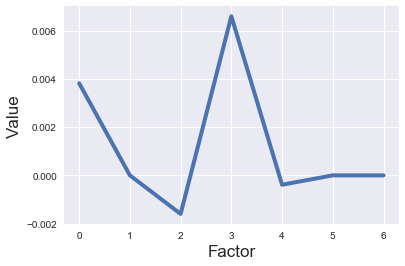

In [140]:
from statsmodels.sandbox.tools.tools_pca import pcasvd

#these are the original dataset columns that I
#have chosen to include in a Principal Components
#Analysis - a type of unsupervised learning
ch26_1_str = [#"S&P_Price",
              #"S&P_Dividends",
              #"S&P_Earnings",
              #"rf_1yr",
              "rf_10yr",
              "CPI",
              "real_1yr",
              #"real_pc_c",
              #"real_stock_price",
              #"pv_real_dividends_const_r",
              #"pv_real_dividends_r",
              #"pv_real_dividends_const_disc",
              #"S&P_real_Dividend",
              #"S&P_Return",
              "ln_S&P_Return",
              #"real_Earnings",
              #"P/E",
              #"E_10yr",
              "P/(E_10yr)",
              "Gold",
              "Real_Estate"
               ]

ch26_1_pca = ch26_1[ch26_1_str]
ch26_1_cols = list(ch26_1_pca.columns)
years = list(ch26_1_pca.index.values)

#norm_cols = [3,4,6,13,14,16,18]
norm_cols = [0,2,3,4]
#exp_cols = [0,1,2,5,7,8,9,10,11,12,15,17]
exp_cols = [1,5,6]

ch26_1_norm_cols = [ch26_1_cols[i] for i in norm_cols]
ch26_1_exp_cols = [ch26_1_cols[i] for i in exp_cols]

#using the z-score for inclusion in the PCA calculations
for col in ch26_1_norm_cols:
    ch26_1_pca[col] = (ch26_1_pca[col] - ch26_1_pca[col].mean())/ch26_1_pca[col].std(ddof=0)

#here the z-score is a function of exponential time-series
#data, really it needs to be updated with a LaPlace distribution
#for the std deviation calculations
for col in ch26_1_exp_cols:
    ch26_1_pca[col] = (np.log(1+ch26_1_pca[col].pct_change()) - np.log(1+ch26_1_pca[col].pct_change()).mean())/np.log(1+ch26_1_pca[col].pct_change()).std(ddof=0)


print(ch26_1_pca)

matr = ch26_1_pca.dropna()
matr = np.asarray(matr)
print(matr)

factorss = [i for i in range(len(ch26_1_str))]

plt.clf()
mn = matr.mean(0)

print(mn.round(1))

plt.plot(factorss, mn, '-', lw=4)
plt.grid(True)
plt.xlabel("Factor", size=17)
plt.ylabel("Value", size=17)

xreduced, scores, evals, evecs = pcasvd(matr)

7.078710870086707


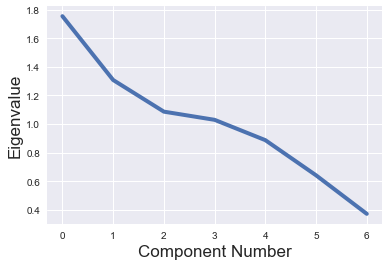

In [11]:
plt.clf()
plt.plot(evals[0:10], lw=4)
plt.grid(True)
plt.xlabel("Component Number", size=17)
plt.ylabel("Eigenvalue", size=17)
totalss = sum(evals)
print(totalss)

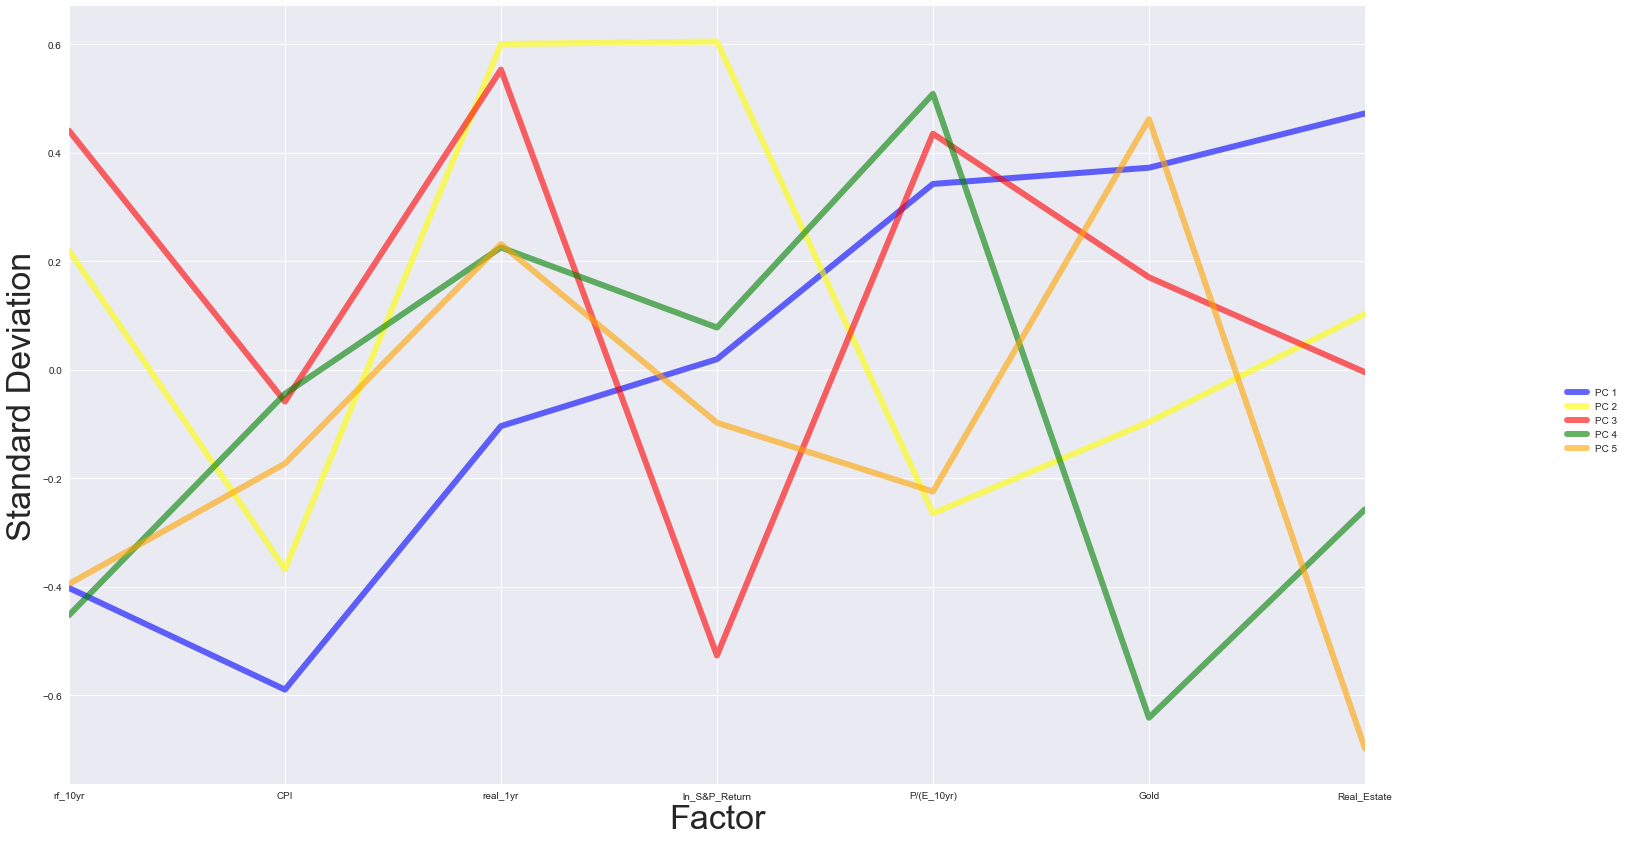

In [12]:
plt.figure(figsize=(24,12))
plt.clf()
plt.axes([0.1, 0.1, 0.75, 0.9])
plt.plot(factorss, evecs[:, 0], lw=6, alpha=0.6, label="PC 1", color="blue")
plt.plot(factorss, evecs[:, 1], lw=6, alpha=0.6, label="PC 2", color="yellow")
plt.plot(factorss, evecs[:, 2], lw=6, alpha=0.6, label="PC 3", color="red")
plt.plot(factorss, evecs[:, 3], lw=6, alpha=0.6, label="PC 4", color="green")
plt.plot(factorss, evecs[:, 4], lw=6, alpha=0.6, label="PC 5", color="orange")
ha,la = plt.gca().get_legend_handles_labels()
leg = plt.figlegend(ha, la, loc="center right")
leg.draw_frame(False)

my_xticks = ch26_1_str

plt.xticks(factorss, my_xticks)
plt.xlabel("Factor", size=34)
plt.ylabel("Standard Deviation", size=34)
plt.xlim(0, 6)
plt.savefig("PCA_factors.png", bbox_inches="tight")

In [13]:
def make_plot(ix):
    """
    Plot the workout results for the years with index in `ix`.
    """
    plt.figure(figsize=(9,5))
    plt.clf()
    plt.axes([0.1, 0.1, 0.7, 0.8])
    ha, lb = [], []
    for i in ix:
        a, = plt.plot(factorss, matr[i,:], '-')
        lb.append(years[i][0:10])
        ha.append(a)
    a, = plt.plot(factorss, mn, '-', color='grey')
    ha.append(a)
    lb.append("Mean")
    leg = plt.figlegend(ha, lb, "center right")
    leg.draw_frame(False)
    plt.xlabel("Factor", size=17)
    plt.xlim(0,4)
    my_xticks = ch26_1_str
    plt.xticks(factorss, my_xticks)
    plt.ylabel("Value", size=17) 

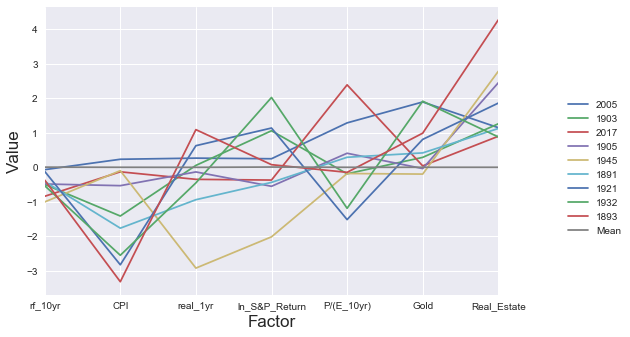

In [15]:
ii = np.argsort(scores[:,0])
make_plot(ii[-9:])


###note, all the following years should actually be
#year+1 - need to update that

[ 90  91  27  29  28  93  85  84  26  94   9 100  56  51  57  92  19  98
  22  79  12   2  89  99   0   5  97  35  14  60  24  33  95 101  83  30
 104  86 106  52  18  88 102  87  80  78  61  76  67  50  23  17  66 117
 118  10  16  58  77 105  32 103  69  68  70  39  63  47  72  75 121  25
  73   8  44  34   7  71  36 107  65 119  46  74  96  45  81   4 122 116
  21  54  64  48 110  82  53 120  37  38  62  43  49 123 109  40 126  59
 112  41 124 114 108   6 125 111  20 113  11 115  13 127  15  55   1  31
  42   3]


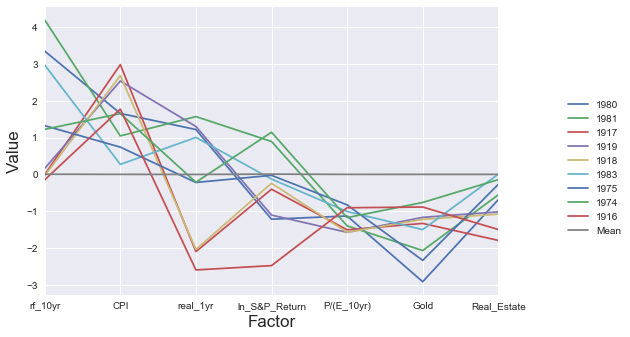

In [16]:
make_plot(ii[0:9])
print(ii)

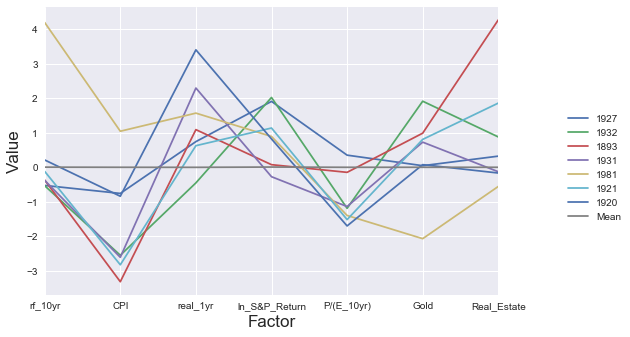

In [17]:
ii = np.argsort(scores[:,1])
make_plot(ii[-7:])

[ 26  55   8  56  50 117  27  83  46  28  82 111  51 110  43  25 120 109
 127  11  18 116 124  78  86  66  49 113  75 121  57 114  12  22 119  88
  60  16 126 108 103  71  29 125  89  21  38 123   1  65  77 115  15  99
  52 101 102  87  48  96  76  23  81  74 122 112  40   9 118  68  69  39
  62  59  80  10  61   4  53  79  85  45  73  72  70  14 105  47  32   7
   6   5  84 107  90  19  54  24 106  35  64  67  58  34  97 100  98  20
  44  33 104  17  13  92  63  93   0   2  95  36  94  37  42   3  41  91
  31  30]


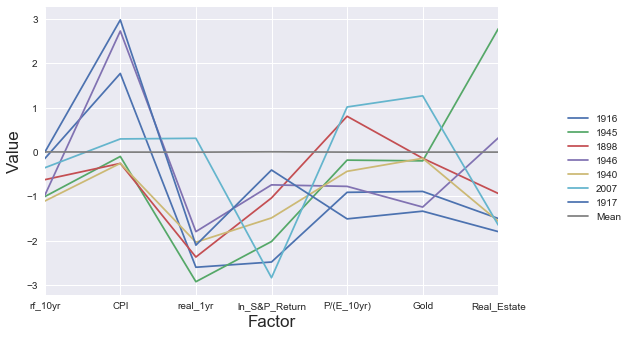

In [18]:
make_plot(ii[0:7])
print(ii)

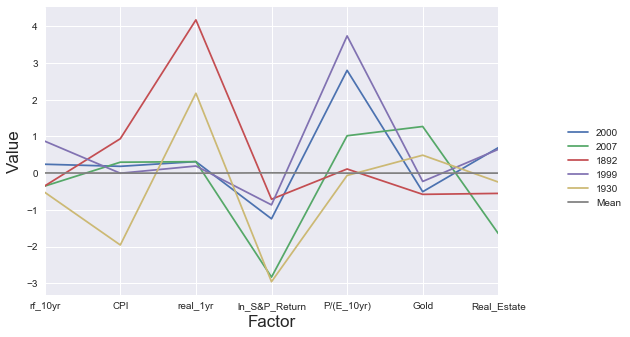

In [19]:
ii = np.argsort(scores[:,2])
make_plot(ii[-5:])

[ 28  44  59  27  51  54  56  52  63  42  60  53  67  45  57 122 118  55
  24  18  34  25  17  58  50  64  33  84  61  26  47  36 121  13   8  31
   7  37  21   6 125 123 126  62   9  32  48  11  72  65  85  70 112  14
  35  10 119   1  49   4  76  87  66  68  43 100  73  23  22 120  15  69
 124  20 105  80 104  74   0  29 114  81  98  88  97 102  95 113  94   5
  71 101 106  77  86 107  79   3 127  19  92 103  89 115  30  75  96  41
 116  99  46  78  93  12  91 108  16  38  83  82  90 111  39 110 117   2
 109  40]


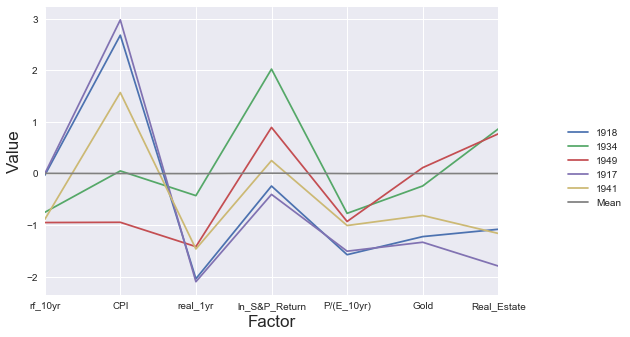

In [20]:
make_plot(ii[0:5])
print(ii)

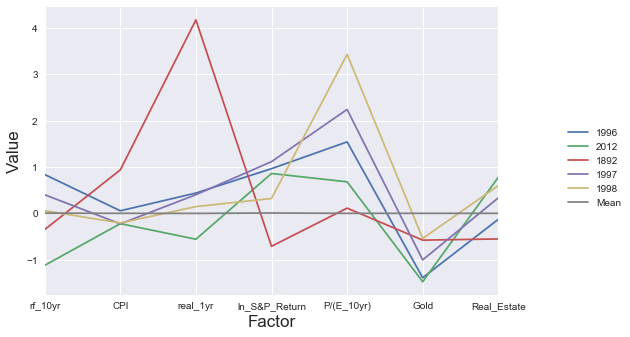

In [21]:
ii = np.argsort(scores[:,3])
make_plot(ii[-5:])

[ 89  88  83  82  87  92  86  43  81  96  42  95  31   3  55  94  91 115
  97  25  80  93  84  32  59  34  21  53  99   1 120  20 119  28 112  26
  62  15  41  13  23  54  77  78  30  98  33  27 102 103  44 111   6 104
 113  52  11  18  90 114  24 116 117  17  49  56  58  50 101  69 100  29
  66  61  79  40  60   4  64  36  63  16  51 118  48  47  22  67  68  65
   8  45  71  85  35  70  72   7  76 125  57  46  75  73 105  74  37 121
  19  38  39 123  10   5 126  14 127   0   9 124  12 110 109 106 122   2
 107 108]


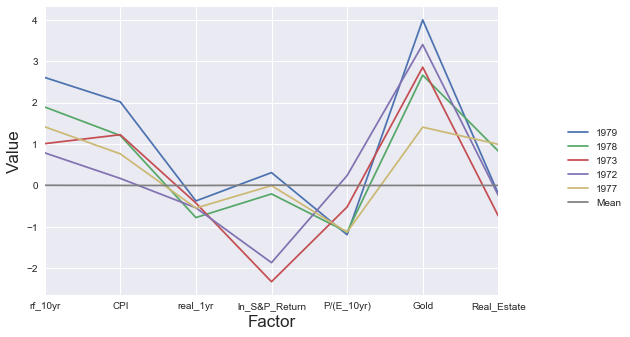

In [22]:
make_plot(ii[0:5])
print(ii)

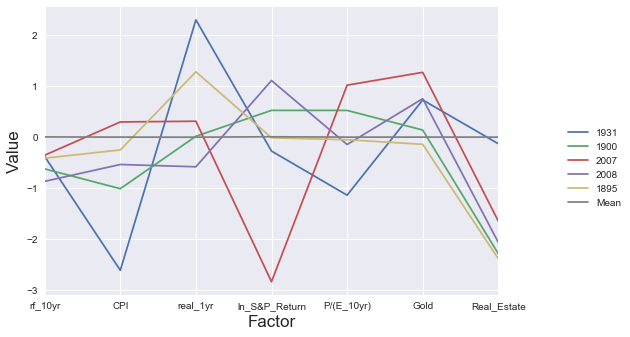

In [23]:
ii = np.argsort(scores[:,4])
make_plot(ii[-5:])

[ 55  90  91  11 109  98   3  94  15  93 108  85 123 107 110  79 106 114
  97 122  56  53  84 127  25 113 104  54  87  99  95 126  44 101 112 111
  62 124 105  96  52   7   9   1  28  13 100  80  78  21  86   6  88 102
 115  34  59  74  16 103 125  45  73  75  92  31  27  76  37  71  69  60
  77  72  49  70  67  23  26  68  64   8 116  61  46  32  66  19  18  51
  65  38  29  20  63  33  48  47  22  81  57  36  89  58  12  42 121   2
 119  35   4  24  39  17  50  30 120  82  43  83  14  40   0  41  10 117
 118   5]


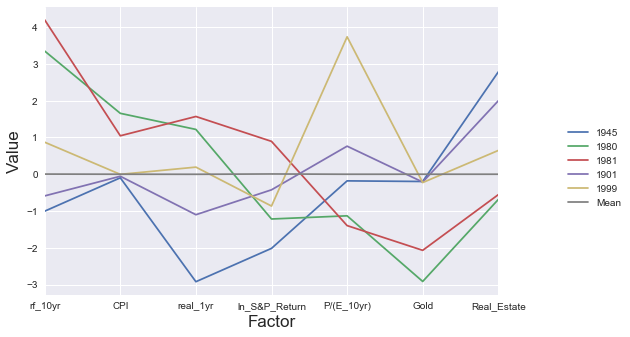

In [24]:
make_plot(ii[0:5])
print(ii)